## Agenda:

1. Train/implement a `binary Naive Bayes classifier` on a synthetic dataset without using Sklearn.
2. Train/implement a `multinomial Naive Bayes classifier` for spam detection without using Sklearn.


# Binary Naive Bayes Classification

### Train/implement a binary Naive Bayes classifier on a synthetic dataset without using Sklearn.

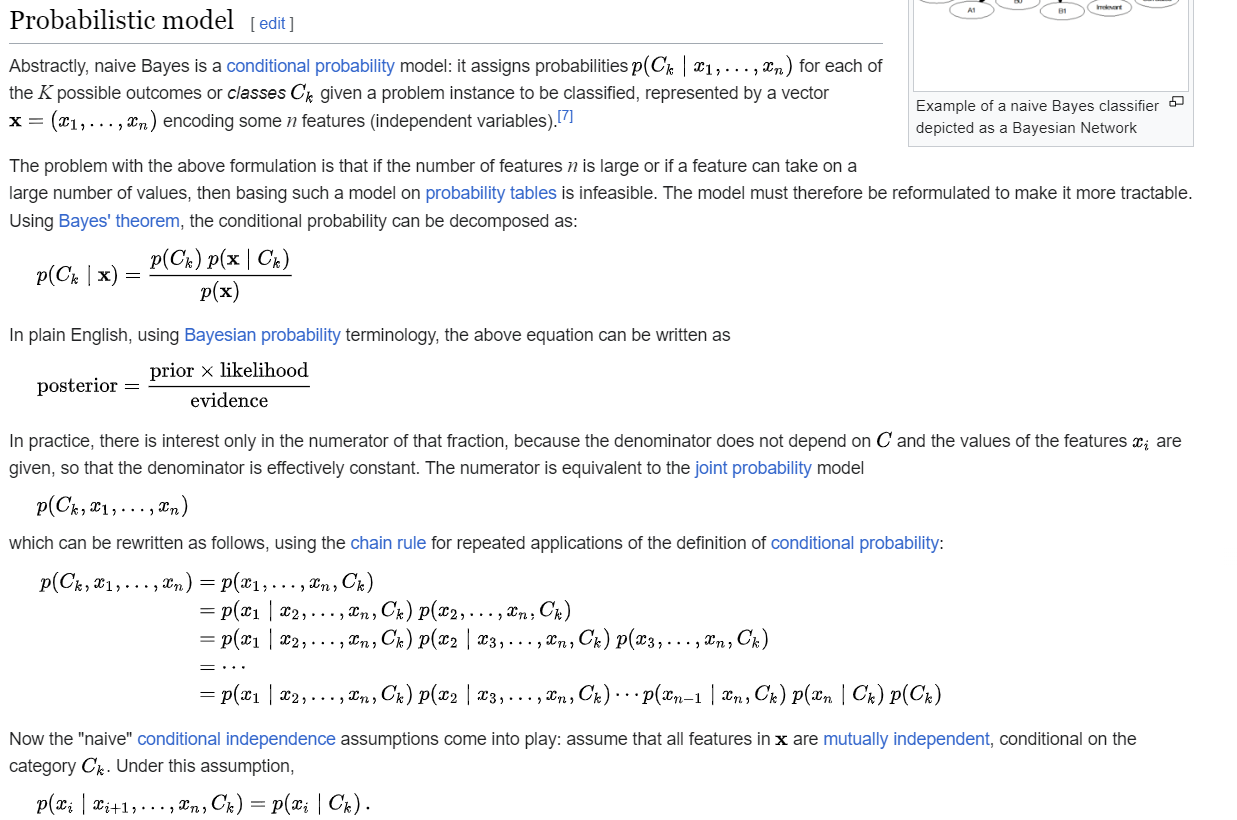

Source: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

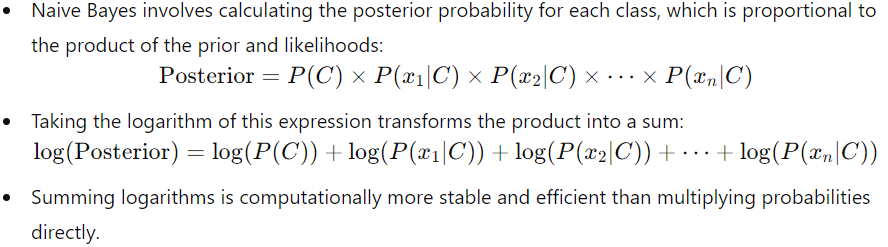

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
#Create the Naive-Bayes Classifier class with the predict method and helper functions

class NaiveBayes:

  # Trains the Naive Bayes classifier
  def fit(self, X, y):
    n_samples, n_features= X.shape
    self._classes= np.unique(y) #get the unique class-labels
    n_classes= len(self._classes) #get no. of unique class labels

    #arrays for storing mean, variance and prior probabilities
    self._mean= np.zeros((n_classes, n_features), dtype=np.float64) # A matrix to store the mean of each feature for each class.
    self._var= np.zeros((n_classes, n_features), dtype=np.float64)  # stores the variance of each feature for each class
    self._priors= np.zeros((n_classes), dtype=np.float64)   # An array to store the prior probabilities of each class, initialized to zeros.

    for idx, c in enumerate(self._classes):
      X_c=X[y==c] # Selects the rows of X where the target label y matches the current class c.

      #calculate mean, variance and prior probabilities of the features for that class-label
      self._mean[idx,:]= X_c.mean(axis=0) # Calculates and stores the mean of each feature for the current class c.
      self._var[idx,:]= X_c.var(axis=0) #  Calculates and stores the variance of each feature for the current class c.
      self._priors[idx]= X_c.shape[0]/float(n_samples) # Calculates and stores the prior probability of the current class c

  # This method predicts the class labels for a given set of samples X.
  def predict(self, X):
    y_pred= [self._predict(x) for x in X] # For each sample x in X, the _predict method is called to determine the class label. The results are stored in the list y_pred.
    return np.array(y_pred)


  # to compute the posterior probability
  def _predict(self, x):
    probs= []

    for idx, c in enumerate(self._classes):
      prior= np.log(self._priors[idx]) # calculates the logarithm of the prior probability for the current class.
      posterior= np.sum(np.log(self._pdf(idx, x))) # calculates the sum of the log-likelihoods (the log of the Gaussian probability density function) for all features of the sample x for the current class.
      probs.append(posterior+prior)

    return self._classes[np.argmax(probs)] #return the argmax class-label

  # For computing the likelihood of each feature under the Gaussian distribution assumption
  def _pdf(self, class_idx, x):
    mean= self._mean[class_idx]
    var= self._var[class_idx]
    f_val=(np.exp(-((x-mean)**2)/(2*var)))/(np.sqrt(2*np.pi*var)) # This formula calculates the probability density function for each feature in x using the Gaussian distribution.
    return f_val

In [ ]:
def accuracy(y_true, y_pred):
  acc= np.sum(y_true==y_pred)/len(y_pred)
  return acc

In [ ]:
#Create a binary classification dataset with 1000 data-points and 10 features
X,y= datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=25)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=25)

In [ ]:
nbayes= NaiveBayes() #object of the NaiveBayes class
nbayes.fit(X_train, y_train) #fit to training data
y_preds= nbayes.predict(X_test) #get predicition on test data

print("Classification accuracy: ", accuracy(y_test, y_preds)) #evaluate performance of classsifier

Classification accuracy:  0.9166666666666666


# Multinomial Naive Bayes Classifier

### Train/implement a multinomial Naive Bayes classifier for spam detection without using Sklearn.

- In <b>Binary Naive Bayes</b>, features are binary, meaning each <b> feature can only take on one of two possible values, typically 0 or 1 </b>. This approach is often used when the presence or absence of a feature is more important than its frequency.

- In <b> Multinomial Naive Bayes </b> , features represent counts or frequencies. <b> Each feature can take on any non-negative integer value, which indicates the number of times a particular feature (like a word) appears in a sample.</b>

Multinomial naive bayes is the naive Bayes algorithm for multinomially distributed data. Everything is similar to Gaussian NB except the $P(x_i \mid y)$. The new equation is,

$$
P(x_i \mid y) = \frac{N_{yi} + \alpha}{N_y + \alpha n} \tag{1}
$$

Here,
* $\alpha$ is the smoothing parameter,
* $N_{yi}$ is the count of feature $x_i$ in class y.
* $N_y$ is the total count of all features in class y
* $n$ is the total number of features

# Multinomial Naive Bayes

## Multinomial Data
|   $X_1$|$X_2$|$X_3$|
|---|---|---|
|1|0|4|
|4|2|3|

In the table above containing 2 sample of 3 features, we observe that feature $X_1$ has values 1 and 4, and so on. That is the common view of the data. And when other a general model accepts this data, it considers each number as value. For example, $X_{1,2}=3$. But in case of reading a multinomial data, $X_{1,2}$ says how many of feature $X_{2}$ is in sample 1. Meaning $X_{1,2}$ is not value of the feature, instead it is the count of the feature. Let's consider a text corpus. Each sentence is made up of different words $x_i$ and each of those $x_i$ belongs to the vocabulary, $V$. If $V$ contains 8 words, $x_1,x_2,...,x_8$ and if a sentence is: x1 x2 x2 x6 x3 x2 x8, the representation of that sentence will be-

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$|$x_6$|$x_7$|$x_8$|
|---|---|---|---|---|---|---|---|
| 1|3 |1 | 0| 0|1 | 0|1 |

After inserting some other random sentences, the dataset is-

|$x_1$|$x_2$|$x_3$|$x_4$|$x_5$|$x_6$|$x_7$|$x_8$|
|---|---|---|---|---|---|---|---|
| 1|3 |1 | 0| 0|1 | 0|1 |
| 1|0 |0 | 0| 1|1 | 1|3 |
| 0|0 |0 | 0| 0|2 | 1|2 |



* $N_{yi}$ is the count of feature $x_i$ in each unique class of y. For example, for $y=1$, \
$N_{y,1}=1, N_{y,6}=3$
* $N_y$ is the total count of all features in each unique class of y. For example, for $y=1$, \
$N_y=12$
* $n=8$ is the total number of features
* $\alpha$ is known as smoothing parameter. It is needed for zero probability problem

To calculate likelihoods for a test sentence, all we need is $P(x_i \mid y)$ which will be used to calculate $P(X \mid y)$ from training data. But $P(x_i \mid y)$ is the probability of feature $x_i$ appearing under class y once. If our test sentence has any feature $x_i$ n times, we will need to include $P(x_i \mid y)$ in $P(X \mid y)$ n times too. So, final equation for $P(X_i \mid y)$ will be-
$$
P(X_i \mid y) = P(x_1 \mid y) \times P(x_2 \mid y) \times ... \times P(x_n \mid y)
$$

# Class MultiNB

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
class MultiNB:
    def __init__(self,alpha=1):
        self.alpha = alpha # Laplace smoothing is crucial in Naive Bayes classifiers because it prevents zero probabilities for unseen feature values.

    # calculates the prior probability P(y) for each class y.
    def _prior(self):
        """
        Calculates prior for each unique class in y. P(y)
        """
        P = np.zeros((self.n_classes_))  # Initializes an array P to store the prior probabilities for each class.
        _, self.dist = np.unique(self.y,return_counts=True)
        for i in range(self.classes_.shape[0]): # The loop iterates over each class and calculates its prior probability by dividing the count of samples in that class by the total number of samples (self.n_samples).
            P[i] = self.dist[i] / self.n_samples
        return P # Returns the array P containing the prior probabilities.
    # Training the model
    def fit(self, X, y):
        """
        Calculates the following things-
            class_priors_ is list of priors for each y.
            N_yi: 2D array. Contains for each class in y, the number of time each feature i appears under y.
            N_y: 1D array. Contains for each class in y, the number of all features appear under y.

        params
        ------
        X: 2D array. shape(n_samples, n_features)
            Multinomial data
        y: 1D array. shape(n_samples,). Labels must be encoded to integers.
        """
        # Initialization
        self.y = y # stores the class labels.
        self.n_samples, self.n_features = X.shape # capture the number of samples and features in the dataset X.
        self.classes_ = np.unique(y) # stores the unique class labels.
        self.n_classes_ = self.classes_.shape[0] # stores the number of unique classes.
        self.class_priors_ = self._prior() # stores the prior probabilities calculated by the _prior method.

        # distinct values in each features
        self.uniques = []
        for i in range(self.n_features):
            tmp = np.unique(X[:,i])
            self.uniques.append( tmp )

        self.N_yi = np.zeros((self.n_classes_, self.n_features)) # Count of each feature per class
        self.N_y = np.zeros((self.n_classes_)) # Total count of features per class
        for i in self.classes_: # x axis
            indices = np.argwhere(self.y==i).flatten()
            columnwise_sum = []
            for j in range(self.n_features): # y axis
                columnwise_sum.append(np.sum(X[indices,j]))

            self.N_yi[i] = columnwise_sum # 2d
            self.N_y[i] = np.sum(columnwise_sum) # 1d

    # This method calculates the conditional probability P(xi | y) for a feature xi given class y.
    def _theta(self, x_i, i, h):
        """
        Calculates theta_yi. aka P(xi | y) using eqn(1) in the notebook.

        params
        ------
        x_i: int.
            feature x_i

        i: int.
            feature index.

        h: int or string.
            a class in y

        returns
        -------
        theta_yi: P(xi | y)
        """

        Nyi = self.N_yi[h,i]
        Ny  = self.N_y[h]

        numerator = Nyi + self.alpha
        denominator = Ny + (self.alpha * self.n_features)

        return  (numerator / denominator)**x_i

    def _likelihood(self, x, h):
        """
        Calculates P(E|H) = P(E1|H) * P(E2|H) .. * P(En|H).

        params
        ------
        x: array. shape(n_features,)
            a row of data.
        h: int.
            a class in y
        """
        tmp = []
        for i in range(x.shape[0]):
            tmp.append(self._theta(x[i], i,h))

        return np.prod(tmp)

    def predict(self, X):
        samples, features = X.shape
        self.predict_proba = np.zeros((samples,self.n_classes_))

        for i in range(X.shape[0]):
            joint_likelihood = np.zeros((self.n_classes_))

            for h in range(self.n_classes_): #For each class h, calculates P(y) * P(X|y) (the prior multiplied by the likelihood) and stores it in joint_likelihood[h].
                joint_likelihood[h]  = self.class_priors_[h] * self._likelihood(X[i],h) # P(y) P(X|y)

            denominator = np.sum(joint_likelihood)

            for h in range(self.n_classes_):
                numerator = joint_likelihood[h]
                self.predict_proba[i,h] = (numerator / denominator)

        indices = np.argmax(self.predict_proba,axis=1) # Uses np.argmax to find the class with the highest probability and assigns it as the predicted class for each sample.
        return self.classes_[indices]

# Spam Classification

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("/content/spam.csv",encoding='iso8859_14')
df.drop(labels=df.columns[2:],axis=1,inplace=True)
df.columns=['target','text']

In [ ]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Simple Preprocessing

In [ ]:
def clean_util(text):
    punc_rmv = [char for char in text if char not in string.punctuation] # Punctuation remove
    punc_rmv = "".join(punc_rmv)
    stopword_rmv = [w.strip().lower() for w in punc_rmv.split() if w.strip().lower() not in stopwords.words('english')] # Stopwords (i.e., "a", "an", "the", "and", "but", "in", "on", "of", and "with") remove

    return " ".join(stopword_rmv)

In [ ]:
df['text'] = df['text'].apply(clean_util)

In [ ]:
df

,target,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u å£750 pound prize...
5568,ham,ì b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


# Vectorizing
Conforming the texts to the multinomial format we have discussed in the beginning. Also, classes in y must be converted to integers.

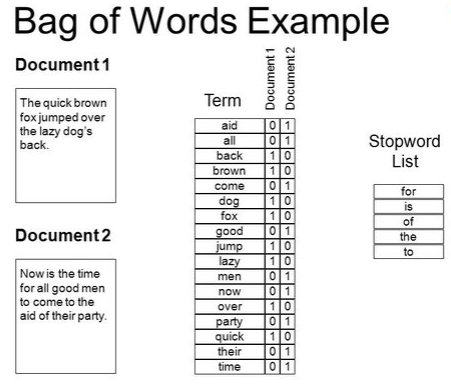

In [ ]:
cv = CountVectorizer() # bag-of-words representation of the text data
X = cv.fit_transform(df['text']).toarray()
lb = LabelBinarizer() # used to convert categorical labels into a binary format (0s and 1s)
y = lb.fit_transform(df['target']).ravel()
print(X.shape,y.shape)

(5572, 9381) (5572,)


In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4179, 9381) (1393, 9381) (4179,) (1393,)


In [ ]:
me = MultiNB()
me.fit(X_train, y_train)
yhat = me.predict(X_test)
print(accuracy_score(y_test,yhat))

0.9705671213208902


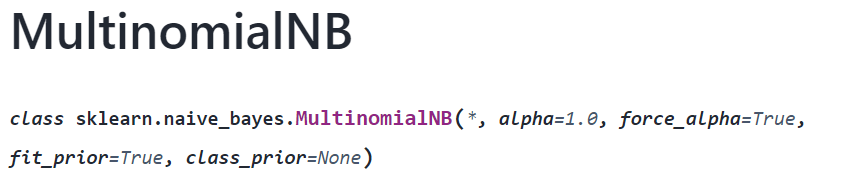

# Assignment Question 2: Multinomial Naive Bayes Using Scikit-Learn ( 5 Marks)

<b> Question: </b>

You are provided with the 20 Newsgroups dataset, a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. Your task is to use the Multinomial Naive Bayes algorithm to classify these text documents into their respective categories <b> using the scikit-learn library </b>.

Instructions:

1. <b> Data Loading and Preparation </b>: [1 mark]

- Use the 'fetch_20newsgroups' function from 'sklearn.datasets' to load the dataset.
- Select 5 categories of your choice from the 20 Newsgroups dataset. Ensure that your dataset is balanced, i.e., each category should have an approximately equal number of documents.
- Preprocess the text data by converting it to lowercase and remove stopwords.

2. <b> Model Implementation: </b> [2 marks]

- Use 'TfidfVectorizer' to convert the text data into a Tf-Idf representation (Hint: from sklearn.feature_extraction.text import TfidfVectorizer).
- Implement the Multinomial Naive Bayes classifier using 'sklearn.naive_bayes.MultinomialNB' with alpha = 0.01.
- Split the dataset into training and testing sets (e.g., 80% training, 20% testing).


3. <b> Evaluation: </b> [1.5 marks]

- Train your Multinomial Naive Bayes model on the training set.
- Evaluate the model's performance on the test set using accuracy, precision, recall, and F1-score.
- Present a classification report and a confusion matrix for the results.

4. <b> Submission Requirements: </b> [0.5 mark]

- Submit the Python code implementing the solution.
- Provide a brief report (300-500 words) explaining your approach, the distribution of data across the selected categories, the preprocessing steps, and the results obtained.







